<a href="https://colab.research.google.com/github/osnapitstrix/UTSML2019_13205669/blob/master/A2_Draft%2016%20September.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. Data Exploration and Pre-Processing**

In [0]:
#basci libraries that need to be imported
import pandas as pd 
import numpy as np
import copy

#required libraries for classification techniques
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt 
from sklearn import model_selection 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

#import different types of classifiers techniques
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from google.colab import auth
auth.authenticate_user()

!pip install -U -q Pydrive
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

data = drive.CreateFile({'id':'1l-xWB5poscP3cglKDZtyX8dJQC79Z3Fo'})
data.GetContentFile('My Uber Drives - 2016.csv')

In [0]:
data = pd.read_csv('My Uber Drives - 2016.csv')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
START_DATE*    1156 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1156 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [0]:
#printing the total number of rows & columns
print(data.shape)

(1156, 7)


In [0]:
#printing the dataset header
#printing the first 5 rows of the dataset 
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/16 21:11,1/1/16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/16 01:25,1/2/16 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [0]:
#printing the dataset header
#printing the last 5 rows of the dataset 
data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


The dataset provided contains seven columns in which six columns are non-null objects and one column is non-null float. The six columns are classified as categorical values and do not contain any numerical values.

1. Miles: Miles is the distance from the start location(departure) and the stop location (arrival)

In [0]:
#only MILES* works since it's a float64 data type
data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [0]:
#printing the dataset header
#printing the last 5 rows of the dataset 
data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [0]:
print((data.groupby('START*')).size())

# to count how many different of starting location
#print(data['START*'].value_counts('').count())

START*
Agnew                           4
Almond                          1
Apex                           17
Arabi                           1
Arlington                       1
Arlington Park at Amberly       1
Asheville                       2
Austin                          1
Banner Elk                      8
Bellevue                        1
Berkeley                       16
Boone                           2
Briar Meadow                    1
Bryson City                     5
Burtrose                        1
CBD                             4
Capitol One                     2
Cary                          201
Central                         8
Chalmette                       1
Chapel Hill                     2
Chessington                     2
College Avenue                  1
Colombo                         8
Columbia Heights                1
Congress Ave District           1
Connecticut Avenue              1
Convention Center District      1
Cory                            1
Couples

In [0]:
print((data.groupby('STOP*')).size())

# to count how many different of stopping location
#print(data['STOP*'].value_counts('').count())

STOP*
Agnew                          4
Alief                          1
Almond                         1
Apex                          17
Arabi                          1
Arlington                      1
Arlington Park at Amberly      1
Arts District                  1
Asheville                      2
Banner Elk                     8
Bay Farm Island                1
Bellevue                       1
Berkeley                      16
Boone                          2
Briar Meadow                   1
Bryson City                    5
Burtrose                       2
Bywater                        1
CBD                            2
Capitol One                    2
Cary                         203
Cedar Hill                     1
Central                        9
Chalmette                      1
Chapel Hill                    1
Chessington                    3
College Avenue                 1
Colombo                        8
Columbia Heights               1
Congress Ave District          3
    

In [0]:
print((data.groupby('CATEGORY*')).size())

# to count how many different of category of travelling
#print(data['CATEGORY**'].value_counts('').count())

CATEGORY*
Business    1078
Personal      77
dtype: int64


In [0]:
print((data.groupby('PURPOSE*')).size())

# to count how many different of purposes of travelling
#print(data['PURPOSE*'].value_counts('').count())

PURPOSE*
Airport/Travel       3
Between Offices     18
Charity ($)          1
Commute              1
Customer Visit     101
Errand/Supplies    128
Meal/Entertain     160
Meeting            187
Moving               4
Temporary Site      50
dtype: int64


**DATA CLEANING and EXPLORATION**

missing (null) value, 507 from the dataset. seems like the purpose of destination is the most that've got the most missing value.

In [0]:
#checking null values from the dataset
print(data.isnull().values.sum())

507


In [0]:
#checking null values by columns
print(data.isnull().sum())

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


In [0]:
#503 missing values from the PURPOSE* attribute
print(data['PURPOSE*'].isnull().value_counts())

False    1156
Name: PURPOSE*, dtype: int64


In [0]:
#replacing missing values with "Unknown Purpose"
data["PURPOSE*"].fillna("Unknown Purpose", inplace = True)

In [0]:
#recheck
print(data['PURPOSE*'].value_counts())

Unknown Purpose    503
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64


In [0]:
#remove the last row of the dataset (since there is no value there except the total number of MILES*)
data.drop(data.tail(1).index, inplace=True)

In [0]:
#recheck all attributes have the same number of rows with unique values (no duplicate).
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    1155 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1155 non-null float64
PURPOSE*       1155 non-null object
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [0]:
#to check if there're duplicate rows
#if its true, yes
#all row showing false => there is no duplication in term of the order number of row. 
data.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1125    False
1126    False
1127    False
1128    False
1129    False
1130    False
1131    False
1132    False
1133    False
1134    False
1135    False
1136    False
1137    False
1138    False
1139    False
1140    False
1141    False
1142    False
1143    False
1144    False
1145    False
1146    False
1147    False
1148    False
1149    False
1150    False
1151    False
1152    False
1153    False
1154    False
Length: 1155, dtype: bool

In [0]:
#from datetime import datetime
# convert the 'Date' column to datetime format 
data['START_DATE*']= pd.to_datetime(data['START_DATE*'], dayfirst=True, errors='coerce') 
data['END_DATE*']= pd.to_datetime(data['END_DATE*'], dayfirst=True, errors='coerce')   
# Check the format of 'Date' column 
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    1155 non-null datetime64[ns]
END_DATE*      1155 non-null datetime64[ns]
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1155 non-null float64
PURPOSE*       1155 non-null object
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


**Visualising the DATA**

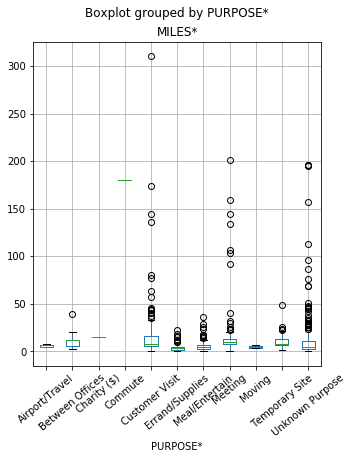

In [0]:
#to checking the correlation between MILES* and PURPOSE* attributes
#one of the interesting data point is:
#purpose "commute" has got the highest distance of travelling (approx more than 300 miles)
data.boxplot('MILES*', 'PURPOSE*', rot = 40, figsize = (5,6))

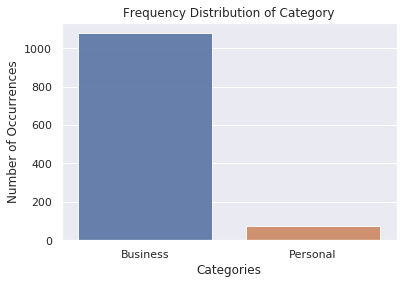

In [0]:
#category represents sa a bar chart
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
category_count = data['CATEGORY*'].value_counts()
sns.set(style = "darkgrid")
sns.barplot(category_count.index, category_count.values, alpha = 0.9)
plt.title('Frequency Distribution of Category')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Categories', fontsize = 12)
plt.show()

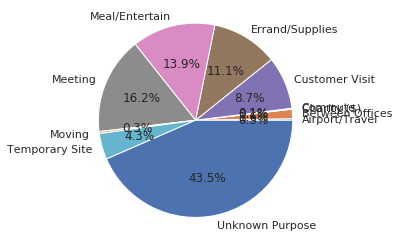

In [0]:
#purpose represents as a pie chart
labels = data['PURPOSE*'].astype('category').cat.categories.tolist()
counts = data['PURPOSE*'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False) #autopct is show the % on plot
ax1.axis('equal')
plt.show()